# Import Librarys

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import torch
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler 
import PIL
from sklearn.metrics import confusion_matrix , classification_report

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Read Data

In [ ]:
#Dataset used: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
path='/content/drive/MyDrive/hmnist_28_28_RGB.csv'
df = pd.read_csv(path)
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
len(df)

10015

# Split 80/20

In [ ]:
#reference https://github.com/rohanmandrekar/Cifar-10-/blob/master/best_attempt%28model7%29.ipynb

fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
print(len(train_set))

8012


In [ ]:
print(len(test_set))

2003


In [ ]:
df.label.unique()

array([0, 4, 2, 5, 1, 6, 3])

# Classes

In [ ]:
# reference: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/discussion/183083
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

# Split to features and target

In [ ]:
x_train = train_set.drop(columns=['label'])
y_train = train_set['label']

x_test = test_set.drop(columns=['label'])
y_test = test_set['label']

columns = list(x_train)
len(columns)

2352

In [ ]:
# # GPU enable
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

# Data Count

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


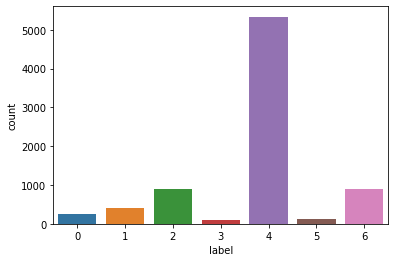

In [ ]:

sns.countplot(y_train)

# Oversampling Train set

In [ ]:
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


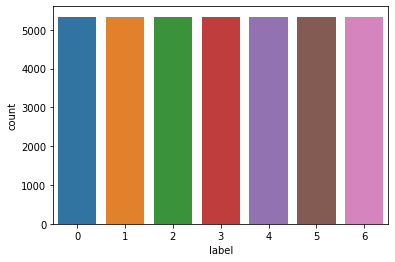

In [ ]:
sns.countplot(y_train)

# Plot some image

In [ ]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

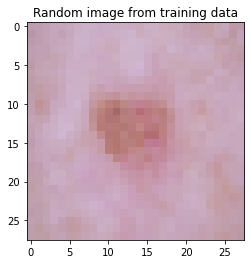

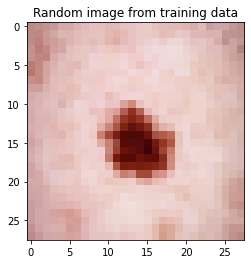

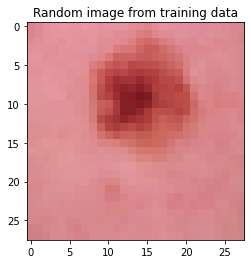

In [ ]:
# num=random.randint(0,8000)
plt.imshow(x_train[0].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# num=random.randint(0,8000)
plt.imshow(x_train[1].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# num=random.randint(0,8000)
plt.imshow(x_train[2].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

# CNN 1

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
#reference: https://www.kaggle.com/dhruv1234/ham10000-skin-disease-classification
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/Raw CNN final/jan_11/val_acc: {val_accuracy:.05f}-val_loss: {val_loss:.05f}-epoch: {epoch:02d}.h5",
                                                  monitor='val_accuracy', mode='max',
                                                 verbose=1, save_best_only=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizer,
              metrics = ['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,
                    y_train,
                    validation_split = 0.2,
                    batch_size = 128,
                    epochs = 200,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/200
234/234 [==============================] - ETA: 0s - loss: 1.2301 - accuracy: 0.5540
Epoch 1: val_accuracy improved from -inf to 0.05407, saving model to /content/drive/MyDrive/Raw CNN final/jan_11/val_acc: 0.05407-val_loss: 2.59141-epoch: 01.h5
234/234 [==============================] - 9s 23ms/step - loss: 1.2301 - accuracy: 0.5540 - val_loss: 2.5914 - val_accuracy: 0.0541
Epoch 2/200
234/234 [==============================] - ETA: 0s - loss: 0.4136 - accuracy: 0.8630
Epoch 2: val_accuracy improved from 0.05407 to 0.40859, saving model to /content/drive/MyDrive/Raw CNN final/jan_11/val_acc: 0.40859-val_loss: 1.49820-epoch: 02.h5
234/234 [==============================] - 3s 12ms/step - loss: 0.4136 - accuracy: 0.8630 - val_loss: 1.4982 - val_accuracy: 0.4086
Epoch 3/200
232/234 [============================>.] - ETA: 0s - loss: 0.2625 - accuracy: 0.9118
Epoch 3: val_accuracy improved from 0.40859 to 0.54443, saving model to /content/drive/MyDrive/Raw CNN final/jan_11/val_

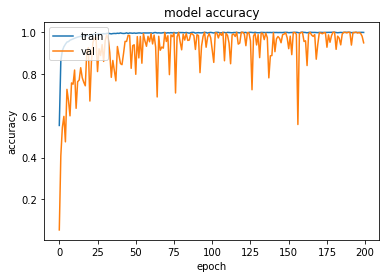

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


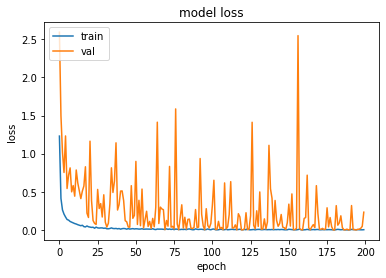

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# model.save("/content/drive/MyDrive/Raw CNN final/best_models/best_model_original.h5")

In [ ]:
model.load_weights('/content/drive/MyDrive/Raw CNN final/best_models/best_model_original.h5') #***

In [ ]:
print(model.evaluate(x_test, y_test))

y_preds = model.predict(x_test)

y_preds = np.round(y_preds)

63/63 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9611
[0.18266814947128296, 0.9610584378242493]
63/63 [==============================] - 0s 2ms/step


In [ ]:
def test_acc_with_img(img):
  image=PIL.Image.open(img)
  image=image.resize((28,28))
  img=x_test[1]
  img=np.array(image).reshape(-1,28,28,3)
  result=model.predict(img)
  # print(result[0])
  result=result.tolist()
  max_prob=max(result[0])
  class_ind=result[0].index(max_prob)
  print(classes[class_ind])

In [ ]:
test_acc_with_img("/content/drive/MyDrive/testing image/akiec.jpg")
test_acc_with_img("/content/drive/MyDrive/testing image/bcc.jpg")
test_acc_with_img("/content/drive/MyDrive/testing image/bkl.jpg")
test_acc_with_img("/content/drive/MyDrive/testing image/df.jpg")
test_acc_with_img("/content/drive/MyDrive/testing image/mel.jpg")
test_acc_with_img("/content/drive/MyDrive/testing image/nv.jpg")
test_acc_with_img("/content/drive/MyDrive/testing image/vasc.jpg")

1/1 [==============================] - 0s 16ms/step
('akiec', 'actinic keratoses and intraepithelial carcinomae')
1/1 [==============================] - 0s 17ms/step
('bcc', 'basal cell carcinoma')
1/1 [==============================] - 0s 16ms/step
('bkl', 'benign keratosis-like lesions')
1/1 [==============================] - 0s 15ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 16ms/step
('mel', 'melanoma')
1/1 [==============================] - 0s 17ms/step
('nv', ' melanocytic nevi')
1/1 [==============================] - 0s 15ms/step
('vasc', ' pyogenic granulomas and hemorrhage')


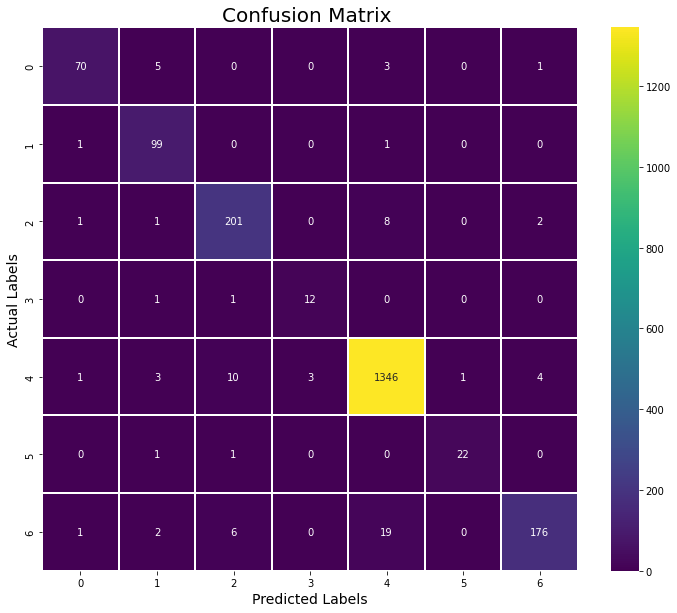

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.88      0.98      0.93       101
           2       0.92      0.94      0.93       213
           3       0.80      0.86      0.83        14
           4       0.98      0.98      0.98      1368
           5       0.96      0.92      0.94        24
           6       0.96      0.86      0.91       204

    accuracy                           0.96      2003
   macro avg       0.92      0.92      0.92      2003
weighted avg       0.96      0.96      0.96      2003



In [ ]:
def cnf_matrix(y_actual,y_pred,name):
  cm = confusion_matrix(y_actual, y_pred)
  plt.figure(figsize = (12, 10))
  # cm = pd.DataFrame(cm , index = [i for i in classes_] , columns = [i for i in classes_])
  sns.heatmap(cm, linecolor='white', cmap='viridis', linewidth=1, annot=True, fmt='')
  plt.title('Confusion Matrix '+name, size=20)
  plt.xlabel('Predicted Labels', size=14)
  plt.ylabel('Actual Labels', size=14)
  plt.show()
  print("Classification Report \n",classification_report(y_actual, y_pred)) 

cnf_matrix(y_test, np.argmax(y_preds, axis=1), "")